In [ ]:
#Verify packages by importing them
import os
from dataset import Dataset
from load import load_transcend
from analysis import Analysis
import visual
import numpy as np
import pandas as pd

In [ ]:
# Set environment variables to set the number of threads (Useful for problem solving)
os.environ["OMP_NUM_THREADS"] = "16"  # Limits OpenMP threads
os.environ["OPENBLAS_NUM_THREADS"] = "16"  # Limits threads for OpenBLAS
os.environ["MKL_NUM_THREADS"] = "16"  # Limits threads for Intel MKL
os.environ["NUMEXPR_NUM_THREADS"] = "16"  # Limits NumExpr threads
os.environ["BLAS_NUM_THREADS"] = "16"  # Limits BLAS threads

In [ ]:
# Create dirs to store results
if not os.path.isdir('./pkl_files'):
    os.mkdir('pkl_files')

if not os.path.isdir('./results'):
    os.mkdir('results')

In [5]:
#Load in Transcend Dataset
PATH = "../Datasets/extended-features/"
X, y, t, f, feature_names, md5 = load_transcend(f"{PATH}extended-features-X-updated.json",
                                                f"{PATH}extended-features-y-updated.json",
                                                f"{PATH}extended-features-meta-updated.json",
                                                f"{PATH}meta_info_file.tsv")

Loading Transcend dataset, this can take up to 3 minutes...
X loaded
y loaded


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000244E1E02800>>
Traceback (most recent call last):
  File "C:\Users\Anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Timestamps loaded
Loading family labels
Family labels loaded
Reducing feature space...
Finished loading Transcend dataset


In [6]:
# Put data in to dataset class
dataset = Dataset(X, y, t, f, feature_names, md5)

# Split dataset and return time aware indexes for training and test
train, test = dataset.time_aware_split_index('month', 6, 1)

In [7]:
# Run Tsne experiments
Analysis(X, y, t, f, feature_names, md5, train, test).tsne(['Dowgin','Dnotua','Kuguo','Airpush','Revmob'])

In [9]:
# Train and test for Airpush
all_families_airpush_id = Analysis(X, y, t, f, feature_names, md5, train, test).run(
                training_family=None, testing_family=None,experiment='base_additional', dataset='Transcend', family='Airpush') # All families with Airpush

Trained model with initial training set of length 25149
Achieved accuracy of 0.976699 and f1 score of 0.903364
Tested on group 0 with 25149 training samples and 9024 testing samples
Tested on group 1 with 25149 training samples and 4896 testing samples
Tested on group 2 with 25149 training samples and 4215 testing samples
Tested on group 3 with 25149 training samples and 6493 testing samples
Tested on group 4 with 25149 training samples and 1316 testing samples
Tested on group 5 with 25149 training samples and 1444 testing samples
Tested on group 6 with 25149 training samples and 1556 testing samples
Tested on group 7 with 25149 training samples and 1244 testing samples
Tested on group 8 with 25149 training samples and 1924 testing samples
Tested on group 9 with 25149 training samples and 1822 testing samples
Tested on group 10 with 25149 training samples and 1964 testing samples
Tested on group 11 with 25149 training samples and 2049 testing samples
Tested on group 12 with 25149 train

In [10]:
# Train and test for all families
all_families_id = Analysis(X, y, t, f, feature_names, md5, train, test).run(
                training_family=None, testing_family=None,experiment='base', dataset='Transcend') # All families base
#all_families_dnotua_id = Analysis(X, y, t, f, feature_names, md5, train, test).run(
#                training_family=None, testing_family=None,experiment='base_additional', dataset='Transcend') # All families with dnotua

Trained model with initial training set of length 25143
Achieved accuracy of 0.976654 and f1 score of 0.903215
Tested on group 0 with 25143 training samples and 9024 testing samples
Tested on group 1 with 25143 training samples and 4896 testing samples
Tested on group 2 with 25143 training samples and 4215 testing samples
Tested on group 3 with 25143 training samples and 6493 testing samples
Tested on group 4 with 25143 training samples and 1316 testing samples
Tested on group 5 with 25143 training samples and 1444 testing samples
Tested on group 6 with 25143 training samples and 1556 testing samples
Tested on group 7 with 25143 training samples and 1244 testing samples
Tested on group 8 with 25143 training samples and 1924 testing samples
Tested on group 9 with 25143 training samples and 1822 testing samples
Tested on group 10 with 25143 training samples and 1964 testing samples
Tested on group 11 with 25143 training samples and 2049 testing samples
Tested on group 12 with 25143 train

In [11]:
# Select families
training_family = ['Dowgin','Dnotua','Kuguo','Airpush','Revmob']
testing_family = ['Dowgin','Dnotua','Kuguo','Airpush','Revmob']

# Run analysis
cbase_id = Analysis(X, y, t, f, feature_names, md5, train, test).run(
                training_family=training_family, testing_family=testing_family,experiment='half_random', dataset='Transcend') # C base experiment
c1_id = Analysis(X, y, t, f, feature_names, md5, train, test).run(
                training_family=training_family, testing_family=testing_family,experiment='snoop_random', dataset='Transcend') # C 1 experiment
c2_id = Analysis(X, y, t, f, feature_names, md5, train, test).run(
                training_family=training_family, testing_family=testing_family,experiment='nogwsnoop_random', dataset='Transcend') # C 2 experiment

Trained model with initial training set of length 4208
Achieved accuracy of 0.988356 and f1 score of 0.988331
Tested on group 0 with 4208 training samples and 745 testing samples
Tested on group 1 with 4208 training samples and 338 testing samples
Tested on group 2 with 4208 training samples and 270 testing samples
Tested on group 3 with 4208 training samples and 390 testing samples
Tested on group 4 with 4208 training samples and 101 testing samples
Tested on group 5 with 4208 training samples and 116 testing samples
Tested on group 6 with 4208 training samples and 130 testing samples
Tested on group 7 with 4208 training samples and 72 testing samples
Tested on group 8 with 4208 training samples and 135 testing samples
Tested on group 9 with 4208 training samples and 70 testing samples
Tested on group 10 with 4208 training samples and 75 testing samples
Tested on group 11 with 4208 training samples and 90 testing samples
Tested on group 12 with 4208 training samples and 110 testing sa

In [12]:
# Loops for solo training
loop_id = []
for train_fam in training_family:
    if train_fam == 'Airpush':                      #Airpush here instead of Dnotua
        experiment_t = 'base_additional'
    else:
        experiment_t = 'base'
    id = Analysis(X, y, t, f, feature_names, md5, train, test).run(
                training_family=[train_fam], testing_family=testing_family,experiment=experiment_t, dataset='Transcend') # Solo family experiments
    loop_id.append(id)

Trained model with initial training set of length 2760
Achieved accuracy of 0.988406 and f1 score of 0.988364
Tested on group 0 with 2760 training samples and 1490 testing samples
Tested on group 1 with 2760 training samples and 676 testing samples
Tested on group 2 with 2760 training samples and 540 testing samples
Tested on group 3 with 2760 training samples and 780 testing samples
Tested on group 4 with 2760 training samples and 202 testing samples
Tested on group 5 with 2760 training samples and 232 testing samples
Tested on group 6 with 2760 training samples and 260 testing samples
Tested on group 7 with 2760 training samples and 144 testing samples
Tested on group 8 with 2760 training samples and 270 testing samples
Tested on group 9 with 2760 training samples and 140 testing samples
Tested on group 10 with 2760 training samples and 150 testing samples
Tested on group 11 with 2760 training samples and 180 testing samples
Tested on group 12 with 2760 training samples and 220 testi

In [13]:
# Write IDs in file for future reference
with open("results/results_files_id",'w') as f:
    f.writelines(f"all_families_id: {all_families_id}")
    f.writelines(f"all_families_airpush_id: {all_families_airpush_id}")
    f.writelines(f"cbase_id: {cbase_id}")
    f.writelines(f"c1_id: {c1_id}")
    f.writelines(f"c2_id: {c2_id}")
    f.writelines(f"dowgin_solo_id: {loop_id[0]}")
    f.writelines(f"dnotua_solo_id: {loop_id[1]}")
    f.writelines(f"kuguo_solo_id: {loop_id[2]}")
    f.writelines(f"airpush_solo_id: {loop_id[3]}")
    f.writelines(f"revmob_solo_id: {loop_id[4]}")

In [14]:
# Load in files
all_families = visual.ResultsLoader().load_file_from_id(all_families_id)
all_families_airpush = visual.ResultsLoader().load_file_from_id(all_families_airpush_id)
cbase = visual.ResultsLoader().load_file_from_id(cbase_id)
c1 = visual.ResultsLoader().load_file_from_id(c1_id)
c2 = visual.ResultsLoader().load_file_from_id(c2_id)
dowgin_solo = visual.ResultsLoader().load_file_from_id(loop_id[0])
dnotua_solo = visual.ResultsLoader().load_file_from_id(loop_id[1])
kuguo_solo = visual.ResultsLoader().load_file_from_id(loop_id[2])
airpush_solo = visual.ResultsLoader().load_file_from_id(loop_id[3])
revmob_solo = visual.ResultsLoader().load_file_from_id(loop_id[4])

In [15]:

# Add LaTeX to PATH explicitly
os.environ["PATH"] += os.pathsep + r"C:\Users\Anthony\AppData\Local\Programs\MiKTeX\miktex\bin\x64"

# Print out the PATH to verify it has been added
print(os.environ["PATH"])

c:\Users\Anthony\AppData\Local\Microsoft\WindowsApps;c:\Users\Anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\Git\cmd;C:\ProgramData\chocolatey\bin;C:\Users\Anthony\AppData\Local\Microsoft\WindowsApps;C:\Users\Anthony\AppData\Local\Programs\Microsoft VS Code\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\Git\cmd;C:\ProgramData\chocolatey\bin;C:\Users\Anthony\AppData\Local\Microsoft\WindowsApps;C:\Users\Anthony\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\Anthony\AppData\Local\Programs\MiKTeX\miktex\bin\x64


transcend_all.pdf
results\transcend_all.pdf
transcend_distribution_all.pdf
results\transcend_distribution_all.pdf
[22 30 46 43 36 51 24 28 37 26 13 20]
results\goodware_snoop_performance.pdf
Top 5 features of C2 and their value changes from C1 to C2
----------
urls::https://www_googletagmanager_com 0.692 41.65 6022.226%
api_calls::android/content/Context;->startService 0.613 33.972 5545.382%
intents::android_intent_category_LAUNCHER 13.307 3.612 27.145%
interesting_calls::Cipher(DES) 2.431 2.334 96.033%
app_permissions::name='com_android_launcher_permission_INSTALL_SHORTCUT' 1.273 1.364 107.191%
Top 5 features of C2 and their value changes from C1 to C2
----------
urls::https://market_android_com 0.956 86.399 9038.947%
urls::https://www_googletagmanager_com 0.785 21.608 2751.322%
urls::https://play_google_com/store/ 12.84 14.161 110.287%
intents::android_intent_action_PACKAGE_ADDED 12.805 12.367 96.577%
urls::http://play_google_com/store/ 12.84 11.343 88.337%
goodware_snoop_diff_crop.p

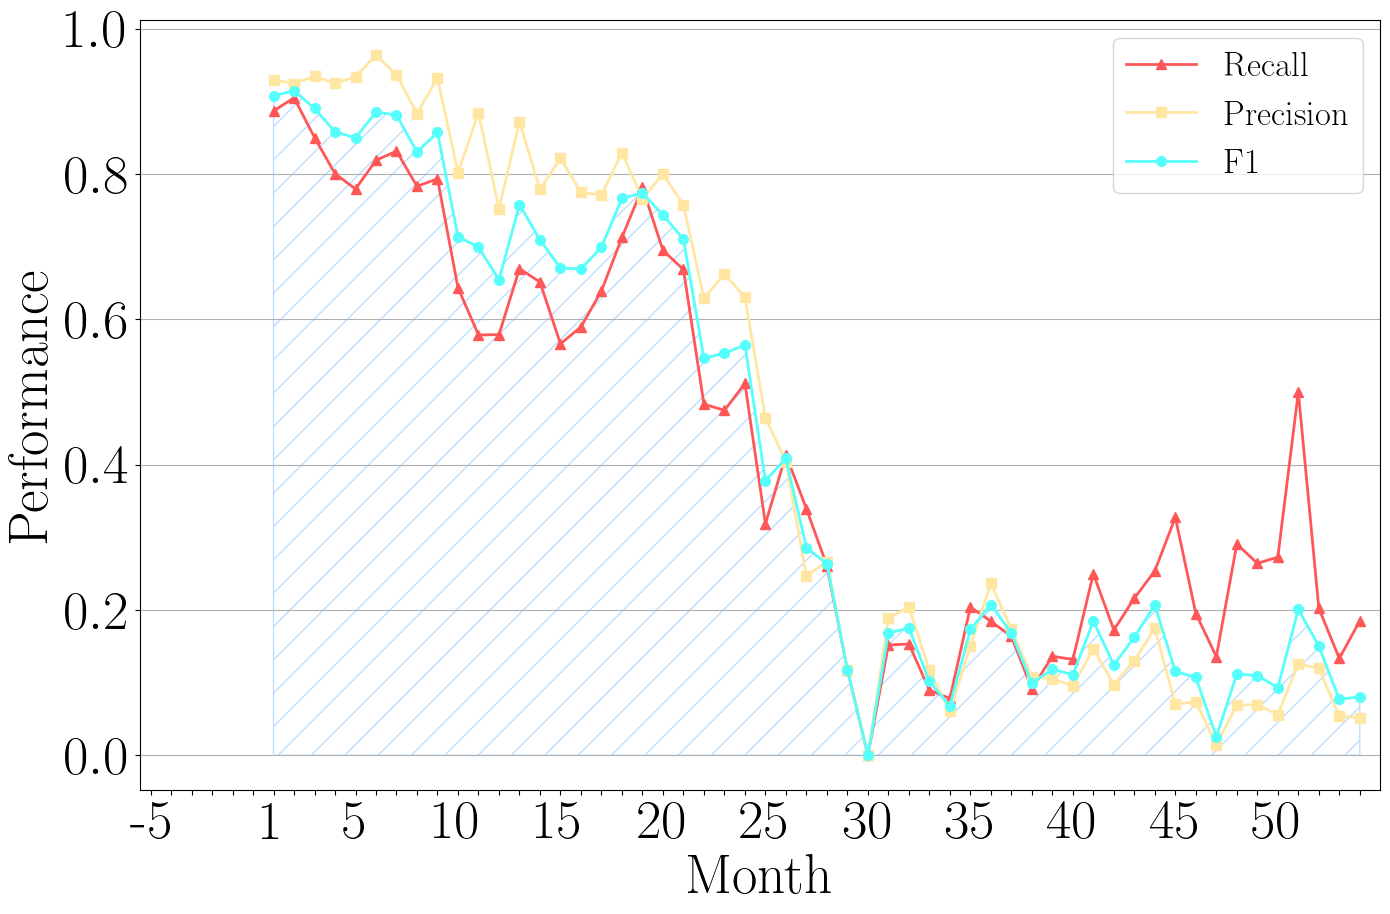

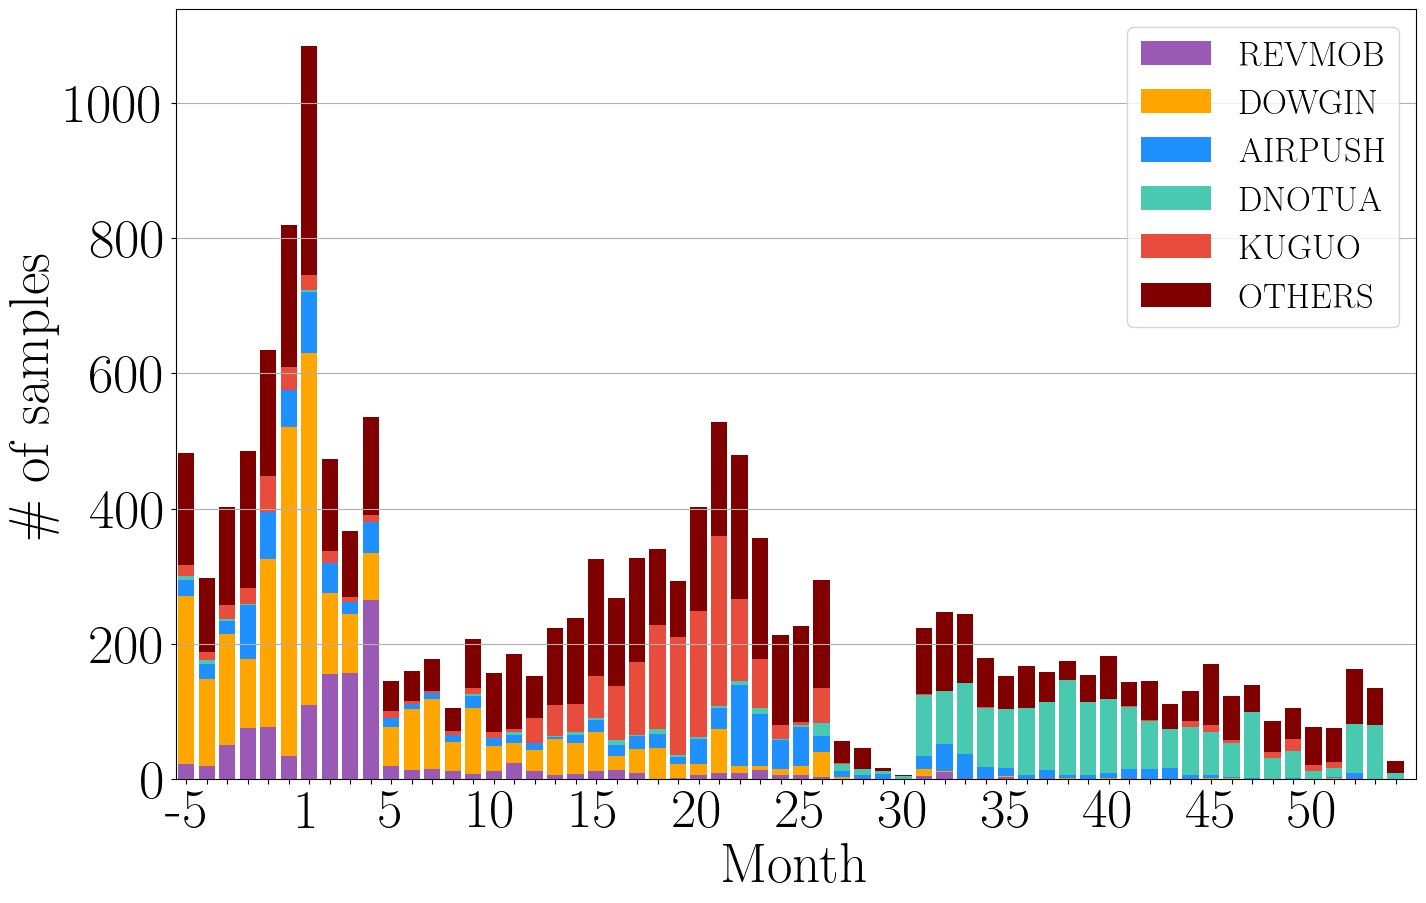

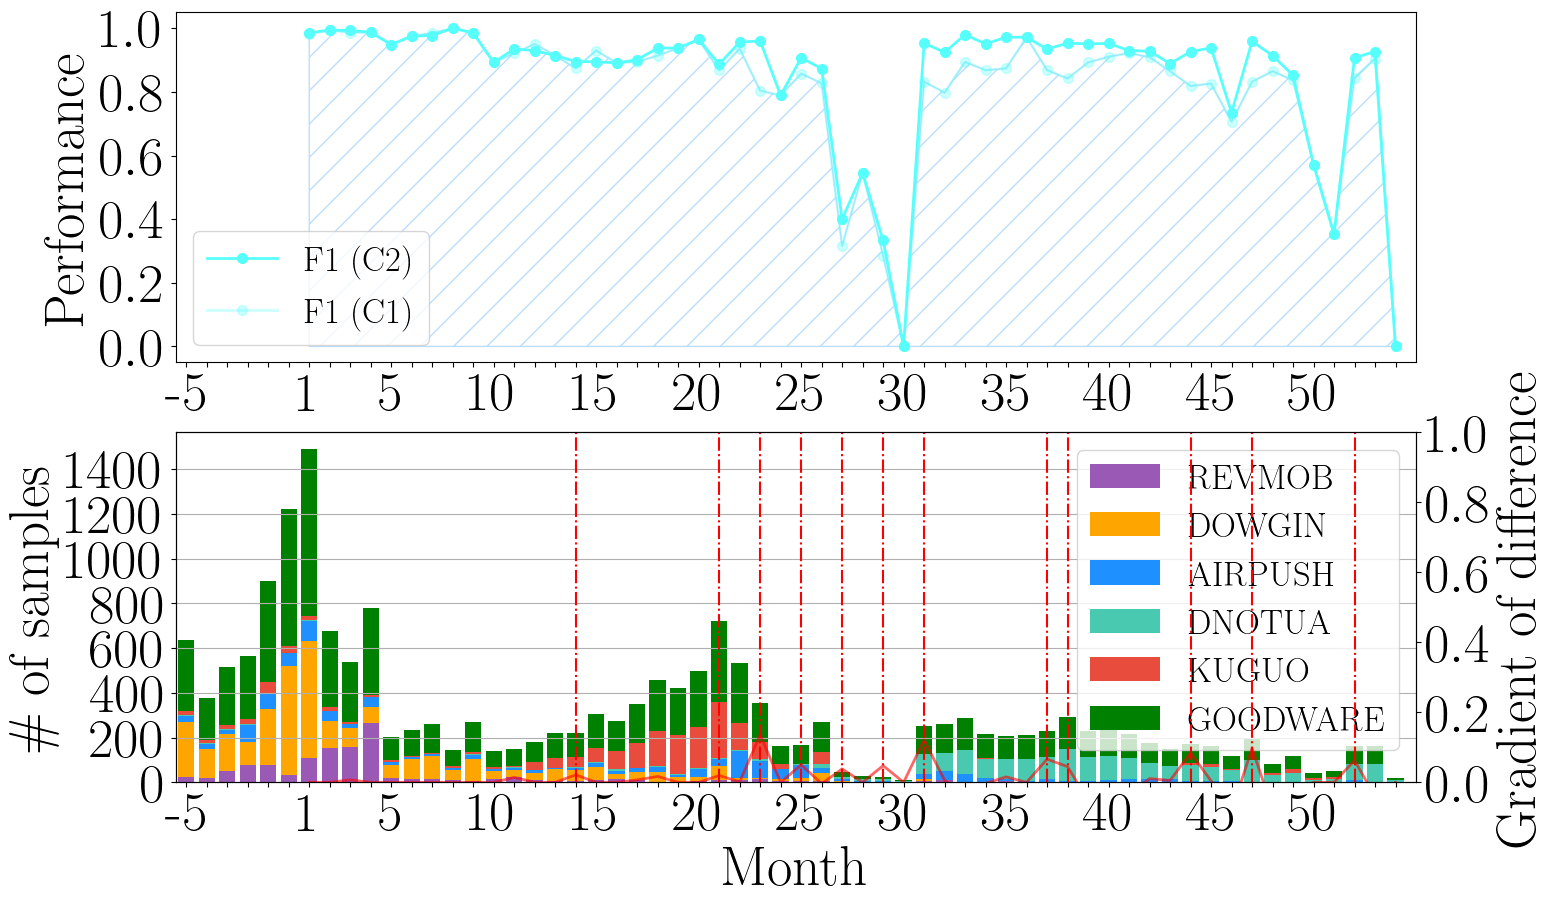

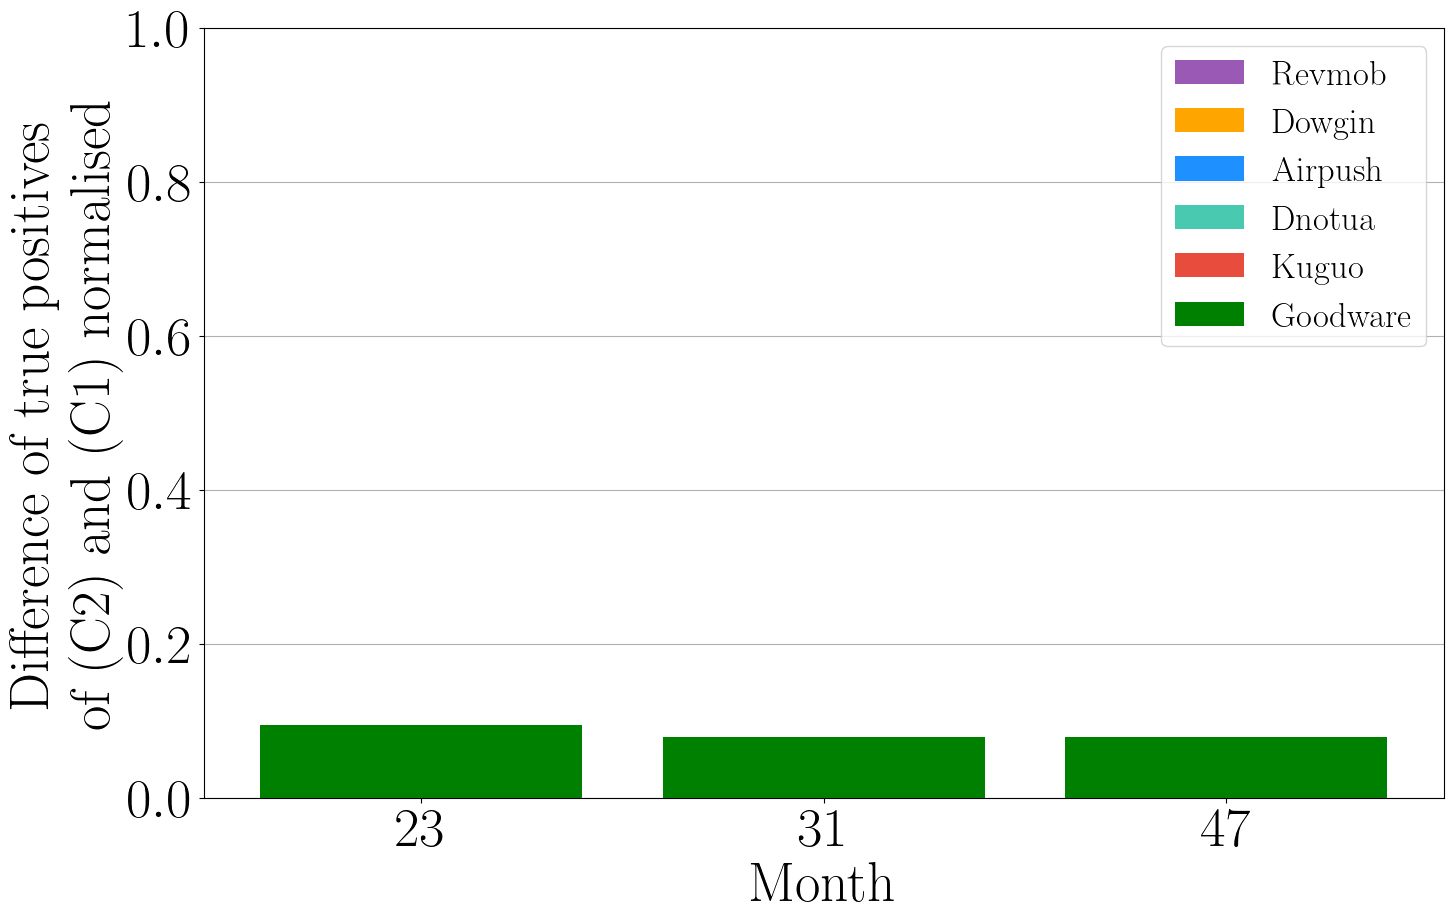

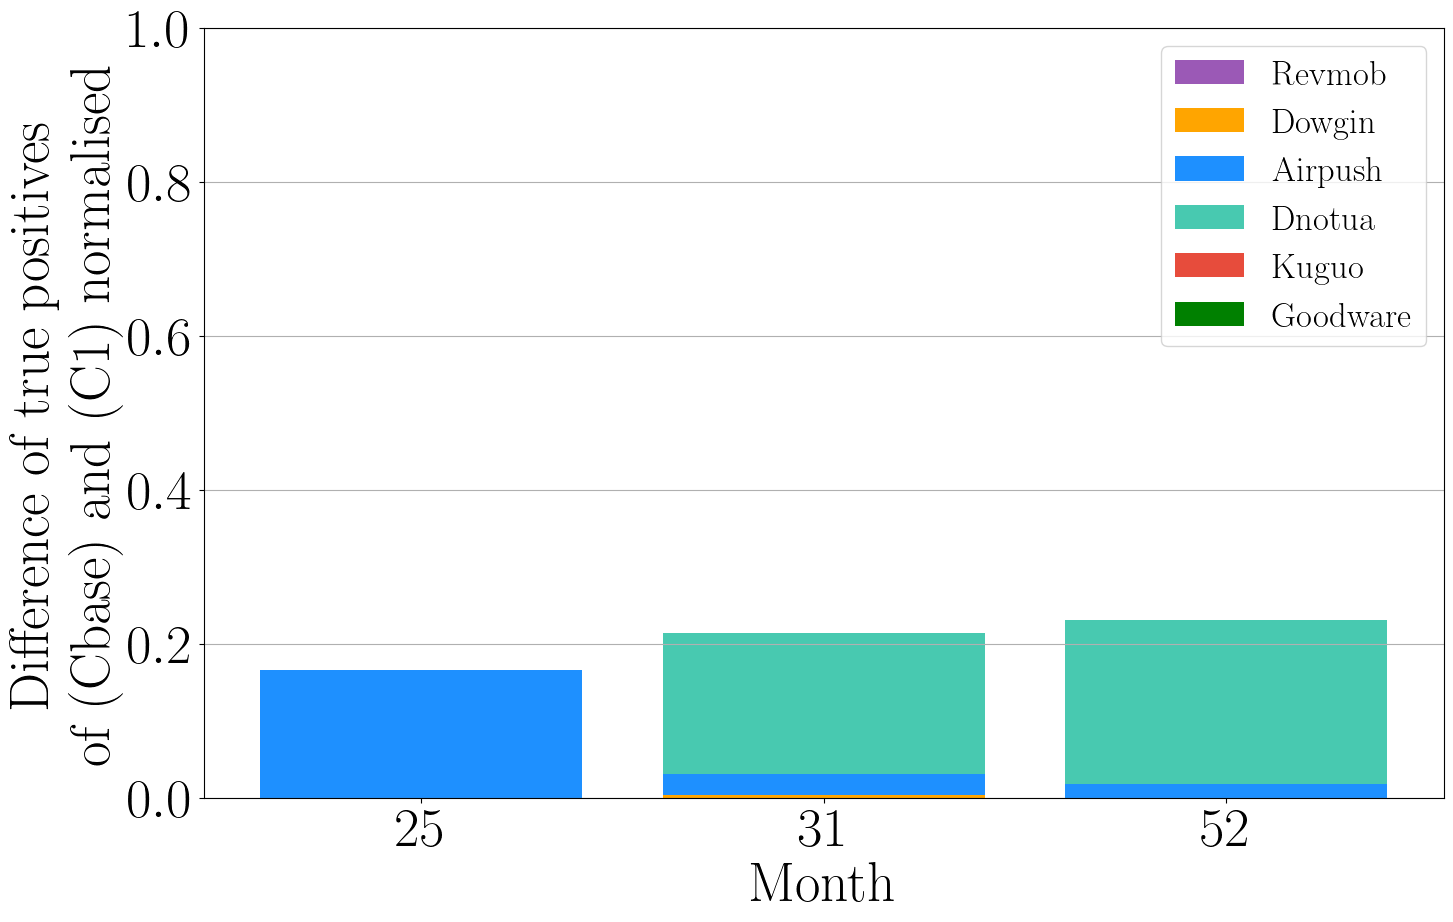

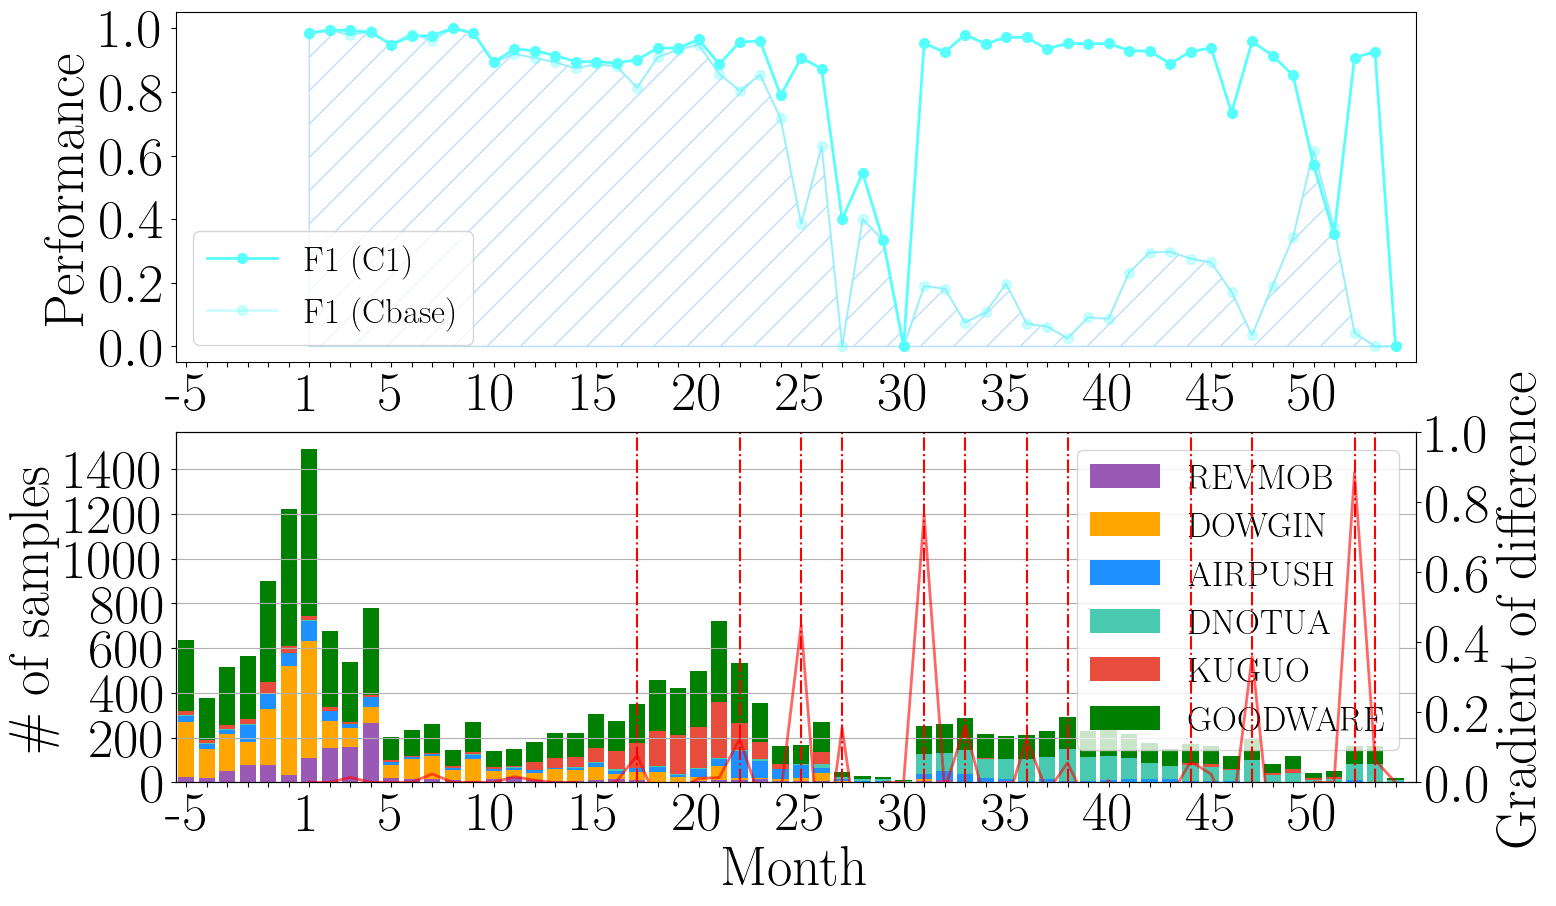

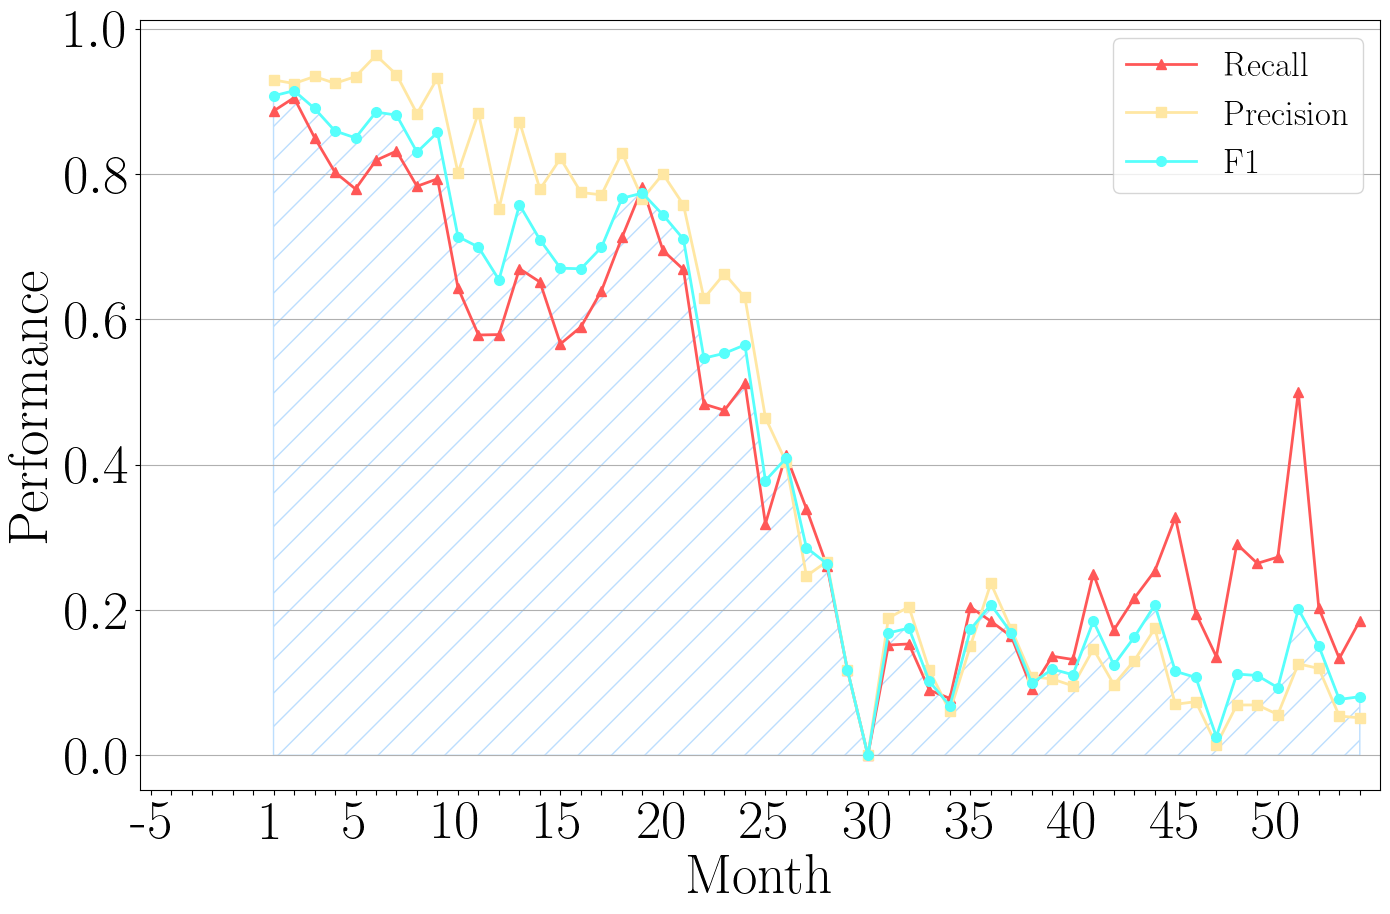

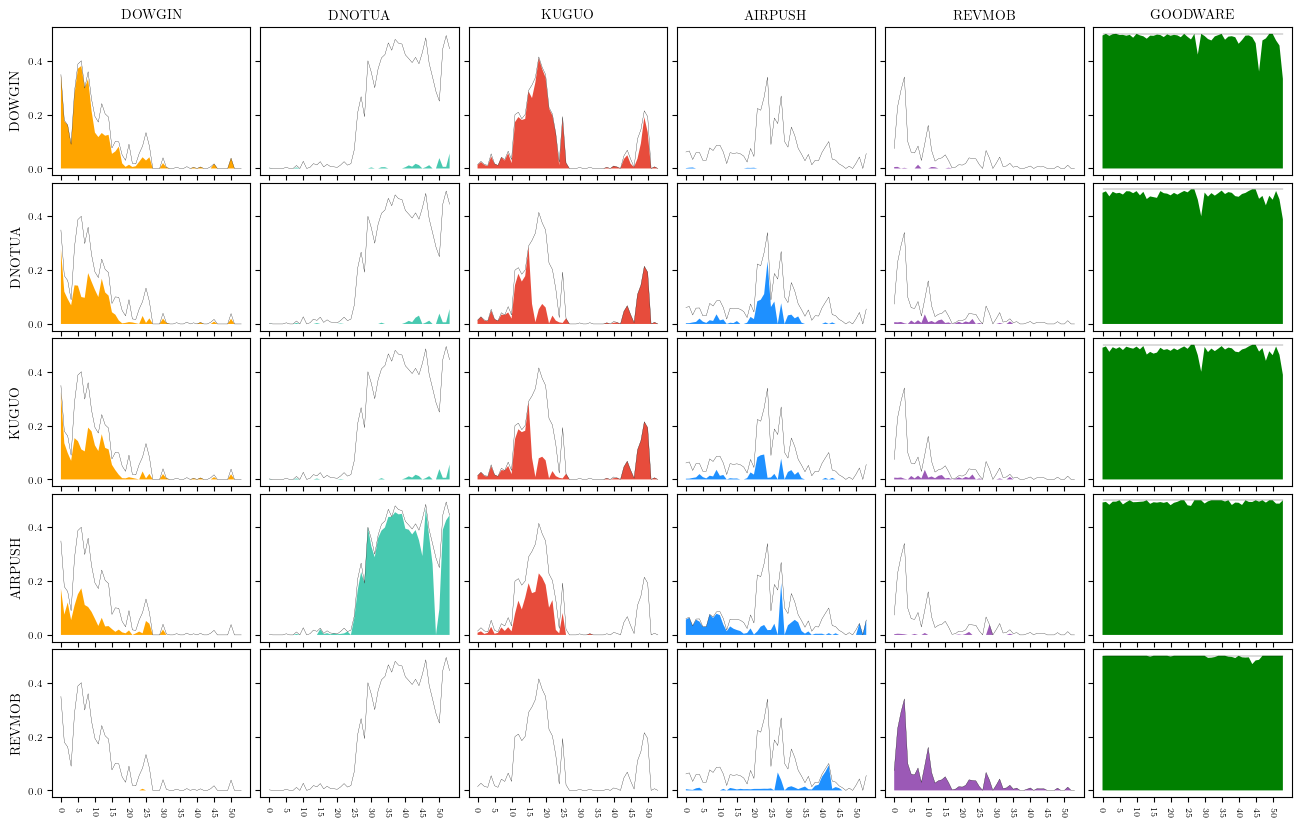

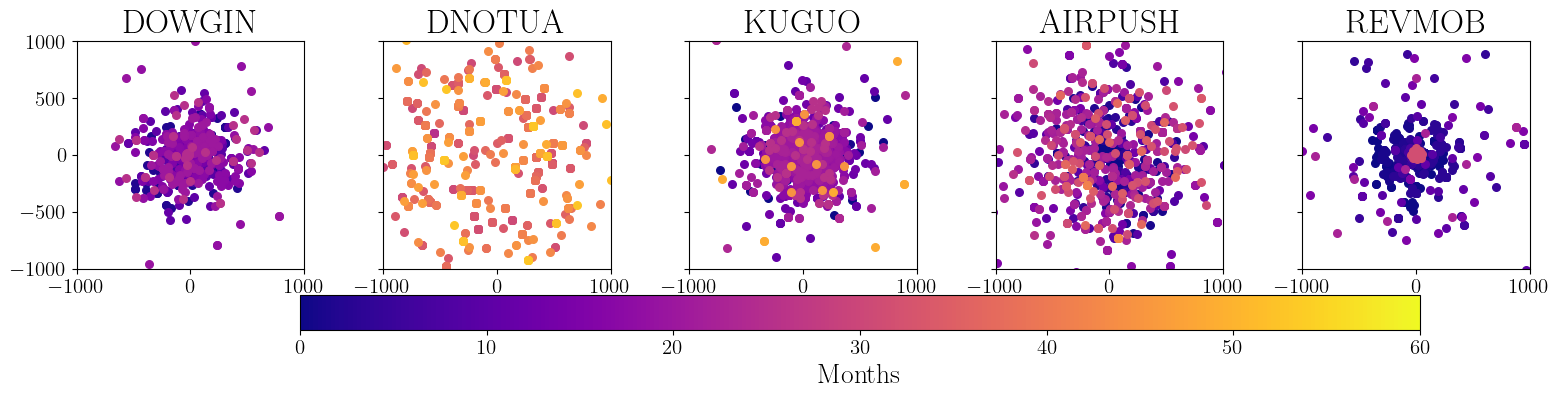

In [16]:
# Plot files and save in output folder
visual.Viz(all_families).plot_single('performance', fname='transcend_all.pdf') # Fig 2a
visual.Viz(all_families).plot_single('distribution', fname='transcend_distribution_all.pdf') # Fig 2b
visual.Viz(c2, c1, label1='(C1)', label2='(C2)').plot_performance_distribution(fname='goodware_snoop_performance.pdf') # Fig 3
visual.VizExpl(cbase,c1).mean_of_weights_of_top_feature_of_missed_family_samples(['DNOTUA'], missed=True) # Table 1
visual.VizExpl(cbase,c1).mean_of_weights_of_top_feature_of_missed_family_samples(['AIRPUSH'], missed=True) # Table 3
visual.Viz(c2, c1, label1='(C2)', label2='(C1)').plot_single('difference', month_selection=[23, 31, 47], fname='goodware_snoop_diff_crop.pdf') # Figure 4a
visual.Viz(cbase, c1, label1='(Cbase)', label2='(C1)').plot_single('difference', month_selection=[25, 31, 52], fname='malware_snoop_diff_crop.pdf') # Figure 4b
visual.Viz(cbase, c1, label1='(Cbase)', label2='(C1)').plot_performance_distribution(fname='malware_snoop_performance.pdf') # Figure 5
visual.Viz(all_families_airpush).plot_single('performance', fname='transcend_all_airpush.pdf') # ********************************************************************************NEW EXPERIMENT AIRPUSH
visual.FamilyIso(dowgin_solo,dnotua_solo,kuguo_solo,airpush_solo,revmob_solo).plot_family_iso_matrix(fname='solo_performance_grid.pdf')# Figure 7 & Table 4
visual.DimensionReduction().tsne_visual(['DOWGIN','DNOTUA','KUGUO','AIRPUSH','REVMOB'], fname='tsne_malware_overtime.pdf')
visual.VizExpl(c1).top_features_of_given_family([1,52,31,25,47,33,27,36,22,17,53,44,37],['DNOTUA']) # Table 5
visual.VizExpl(c1).top_features_of_given_family([1,52,31,25,47,33,27,36,22,17,53,44,37],['KUGUO']) # Table 6